In [182]:
import pandas as pd

In [200]:
train_data = pd.read_csv('ad_10000records.csv')
train_data.head(3)

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Ad Topic Line,City,Gender,Country,Timestamp,Clicked on Ad
0,62.26,32.0,69481.85,172.83,Decentralized real-time circuit,Lisafort,Male,Svalbard & Jan Mayen Islands,2016-06-09 21:43:05,0
1,41.73,31.0,61840.26,207.17,Optional full-range projection,West Angelabury,Male,Singapore,2016-01-16 17:56:05,0
2,44.40,30.0,57877.15,172.83,Total 5thgeneration standardization,Reyesfurt,Female,Guadeloupe,2016-06-29 10:50:45,0


In [226]:
df = train_data.copy()

In [227]:
# 1. cluster the values of each column

In [228]:
geopolitical_regions = {
    "Wealthy":    ["Netherlands", "Finland","Iceland", "Sweden", "Norway","Switzerland", "Germany", "France", "United Kingdom", "Italy", "Spain", "Denmark","England", "Belgium", "Netherlands"],
    "Capitalist": ["United States", "Canada", "Russia", "China", "India", "USA", "Australia","Hong Kong", "Singapore", "Korea", "Japan", "South Korea"],
    "Arab":       ["Iraq", "Iran", "Bahrain", "Egypt", "Saudi Arabia", "Morocco", "UAE","Qatar", "Oman"],
    "Asia":       ["Indonesia", "Vietnam","Singapore","Bangladesh", "Philippines", "Thailand", "Malaysia", "Vietnam"],
    "Europe":     ["Israel", "Turkey", "Poland","Hungary", "Croatia","Greece","Romania","Bulgaria","Portugal", "Albania", "New Zealand"],
    "America":    ["Mexico", "Cuba", "Jamaica", "Brazil", "Argentina", "Colombia", "Chile", "Peru","Bolivia", "Costa Rica", "Panama", "Guatemala", "Honduras", "El Salvador"],
    "Africa":     ["Nigeria", "Kenya", "Ethiopia","Cameroon","Guinea","Uganda","Western Sahara","Rwanda","Angola","Gabon","Burundi","Tonga","Namibia","Ghana"]
}

regions = [i for i in geopolitical_regions]
region2id = {regions[i]:i for i in range(len(regions))}

sample_countries = [country for region in geopolitical_regions.values() for country in region]

def country2id(country):
  for region in geopolitical_regions:
    if country in geopolitical_regions[region]:
      return region2id[region]
  return 7

In [242]:
df['Country'] = df['Country'].apply(country2id)

In [243]:
genders = {'Male': 0, 'Female': 1}
def gender2id(gender):
  return genders[gender]

In [ ]:
df['Gender'] = df['Gender'].apply(gender2id)

In [232]:
df = train_data.copy()

# get unique values of each column
uq = {}
for i in train_data:
  uq[i] = train_data[i].unique()
len(uq['Age'])

39

In [233]:
for i in df:
  print(i)

Daily Time Spent on Site
Age
Area Income
Daily Internet Usage
Ad Topic Line
City
Gender
Country
Timestamp
Clicked on Ad


In [234]:
columns_min_max = {}

def min_max(column):
  Min = min(train_data[column])
  Max = max(train_data[column])
  print(f'Min and Max of {column} are: {Min} and {Max}')
  columns_min_max[column] = [Min, Max]
columns = ["Daily Internet Usage", "Age", "Area Income", "Daily Time Spent on Site"]

for i in columns: min_max(i)

Min and Max of Daily Internet Usage are: 105.22 and 269.96
Min and Max of Age are: 19.0 and 60.0
Min and Max of Area Income are: 13996.5 and 79332.33
Min and Max of Daily Time Spent on Site are: 32.6 and 90.97


In [235]:
def get_interval_age(num):
    num_intervals=4
    min_val = columns_min_max['Age'][0]
    max_val = columns_min_max['Age'][1]
    step = (max_val - min_val) / num_intervals
    bounds = [
        min_val + step * i for i in range(num_intervals + 1)
    ]
    if num < min_val or num > max_val:
        return None
    for i in range(num_intervals):
        if bounds[i] <= num < bounds[i + 1]:
            return i
    if num == max_val:
        return num_intervals - 1


def get_interval_usage(num):
    num_intervals=4
    min_val = columns_min_max['Daily Internet Usage'][0]
    max_val = columns_min_max['Daily Internet Usage'][1]
    step = (max_val - min_val) / num_intervals
    bounds = [
        min_val + step * i for i in range(num_intervals + 1)
    ]
    if num < min_val or num > max_val:
        return None
    for i in range(num_intervals):
        if bounds[i] <= num < bounds[i + 1]:
            return i
    if num == max_val:
        return num_intervals - 1


def get_interval_income(num):
    num_intervals=4
    min_val = columns_min_max['Area Income'][0]
    max_val = columns_min_max['Area Income'][1]
    step = (max_val - min_val) / num_intervals
    bounds = [
        min_val + step * i for i in range(num_intervals + 1)
    ]
    if num < min_val or num > max_val:
        return None
    for i in range(num_intervals):
        if bounds[i] <= num < bounds[i + 1]:
            return i
    if num == max_val:
        return num_intervals - 1

def get_interval_site(num):
    num_intervals=4
    min_val = columns_min_max['Daily Time Spent on Site'][0]
    max_val = columns_min_max['Daily Time Spent on Site'][1]
    step = (max_val - min_val) / num_intervals
    bounds = [
        min_val + step * i for i in range(num_intervals + 1)
    ]
    if num < min_val or num > max_val:
        return None
    for i in range(num_intervals):
        if bounds[i] <= num < bounds[i + 1]:
            return i
    if num == max_val:
        return num_intervals - 1

In [236]:
df['Age'] = df['Age'].apply(get_interval_age)
df['Area Income'] = df['Area Income'].apply(get_interval_income)
df['Daily Internet Usage'] = df['Daily Internet Usage'].apply(get_interval_usage)
df['Daily Time Spent on Site'] = df['Daily Time Spent on Site'].apply(get_interval_site)

In [237]:
def get_interval_time(time):
    time = time[11:13]
    num_intervals = 8
    time = (int(time)+1)%24
    min_val = 0
    max_val = 23
    num = int(time)

    step = (max_val - min_val) / num_intervals
    bounds = [
        min_val + step * i for i in range(num_intervals + 1)
    ]
    if num < min_val or num > max_val:
        return None
    for i in range(num_intervals):
        if bounds[i] <= num < bounds[i + 1]:
            return i
    if num == max_val:
        return num_intervals - 1

In [238]:
df['Timestamp'] = df['Timestamp'].apply(get_interval_time)

In [239]:
df.head(3)

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Ad Topic Line,City,Gender,Country,Timestamp,Clicked on Ad
0,2,1,3,1,Decentralized real-time circuit,Lisafort,Male,Svalbard & Jan Mayen Islands,7,0
1,0,1,2,2,Optional full-range projection,West Angelabury,Male,Singapore,6,0
2,0,1,2,1,Total 5thgeneration standardization,Reyesfurt,Female,Guadeloupe,3,0


In [ ]:
!pip install sentence-transformers
!pip install matplotlib
!pip install umap-learn  # or sklearn for t-SNE

In [100]:
import pandas as pd
from sentence_transformers import SentenceTransformer

model = SentenceTransformer('all-MiniLM-L6-v2')

sentences = df["Ad Topic Line"].tolist()

embeddings = model.encode(sentences, show_progress_bar=True)

embeddings_list = embeddings.tolist()

# Check the shape of the embeddings
print(f"Embeddings shape: {len(embeddings_list)} sentences, each of size {len(embeddings_list[0])}")


Embeddings shape: 10000 sentences, each of size 384


<ipython-input-101-de79672b310f>:10: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(embeddings_2d[:, 0], embeddings_2d[:, 1], s=5, cmap='Spectral')


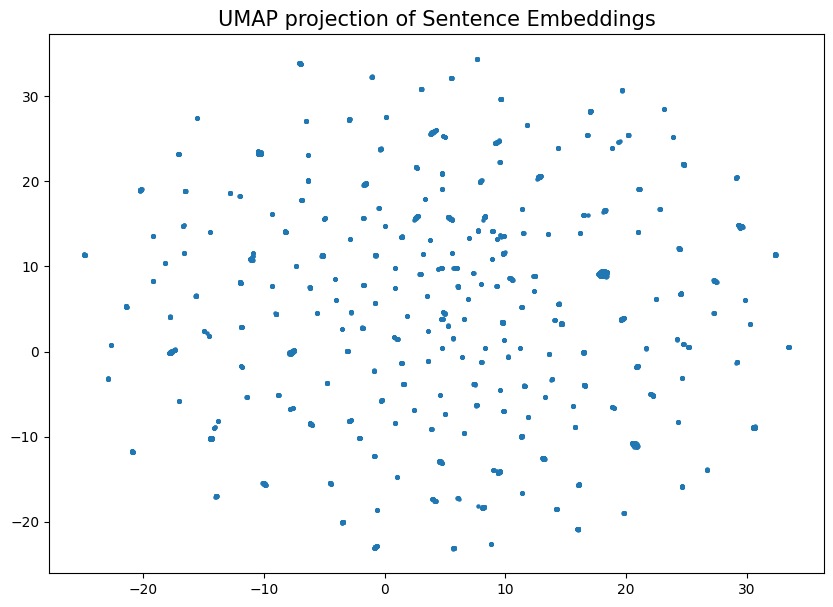

In [101]:
import umap
import matplotlib.pyplot as plt

# Fit UMAP for dimensionality reduction to 2D
reducer = umap.UMAP(n_neighbors=15, min_dist=0.1, metric='cosine')
embeddings_2d = reducer.fit_transform(embeddings)

# Plot the embeddings in 2D
plt.figure(figsize=(10, 7))
plt.scatter(embeddings_2d[:, 0], embeddings_2d[:, 1], s=5, cmap='Spectral')
plt.title('UMAP projection of Sentence Embeddings', fontsize=15)
plt.show()

In [ ]:
pip install scikit-learn

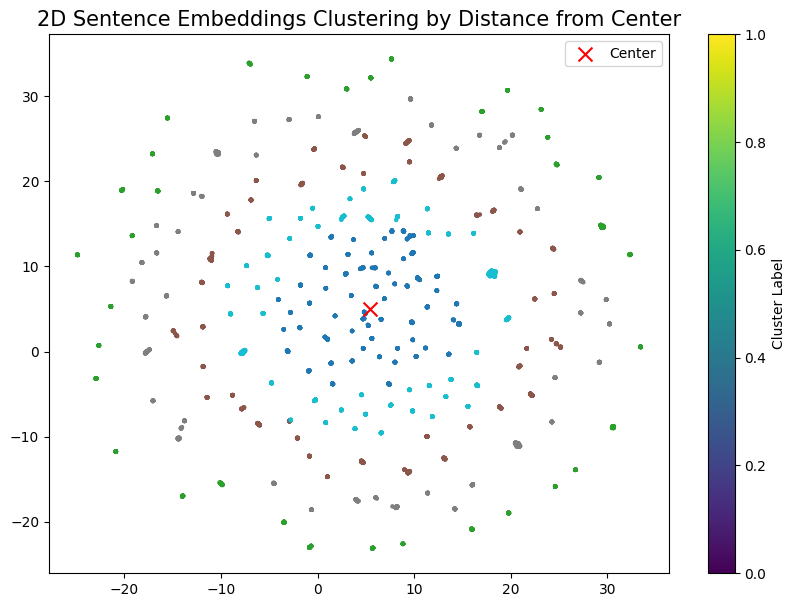

In [109]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# Assuming embeddings_2d contains your 2D projected embeddings from UMAP or t-SNE
# embeddings_2d is of shape (num_sentences, 2)

# 1. Calculate the center of the 2D embeddings
center = np.mean(embeddings_2d, axis=0)

# 2. Compute the Euclidean distance of each point from the center
distances = np.linalg.norm(embeddings_2d - center, axis=1)

# Reshape the distances to be a 2D array for KMeans
distances_reshaped = distances.reshape(-1, 1)

# 3. Apply KMeans clustering to the distances
kmeans = KMeans(n_clusters=5, random_state=42)
clusters = kmeans.fit_predict(distances_reshaped)

# 4. Plot the 2D embeddings with cluster labels
plt.figure(figsize=(10, 7))
plt.scatter(embeddings_2d[:, 0], embeddings_2d[:, 1], c=clusters, cmap='tab10', s=5)
plt.scatter(center[0], center[1], c='red', marker='x', s=100, label="Center")
plt.title('2D Sentence Embeddings Clustering by Distance from Center', fontsize=15)
plt.colorbar(label='Cluster Label')
plt.legend()
plt.show()


In [240]:
df['Topic'] = clusters

In [246]:
df.head(5)

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Ad Topic Line,City,Gender,Country,Timestamp,Clicked on Ad,Topic
0,2,1,3,1,Decentralized real-time circuit,Lisafort,0,7,7,0,2
1,0,1,2,2,Optional full-range projection,West Angelabury,0,1,6,0,1
2,0,1,2,1,Total 5thgeneration standardization,Reyesfurt,1,7,3,0,2
3,1,0,2,2,Balanced empowering success,New Michael,1,7,5,0,1
4,1,1,2,2,Total 5thgeneration standardization,West Richard,1,2,3,1,2


In [248]:
to_drop = ['Ad Topic Line', 'City']
for c in to_drop:
  df = df.drop(c, axis=1)
df.head(3)

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Gender,Country,Timestamp,Clicked on Ad,Topic
0,2,1,3,1,0,7,7,0,2
1,0,1,2,2,0,1,6,0,1
2,0,1,2,1,1,7,3,0,2


In [263]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import mean_squared_error, accuracy_score

target = 'Clicked on Ad'
# 1. Separate features (X) and target (y)
X = df.drop(target, axis=1)
y = df[target]

# 2. One-Hot Encode categorical features
# You can use pd.get_dummies() for simplicity, or OneHotEncoder from sklearn
#X_encoded = pd.get_dummies(X, drop_first=True)
encoder = OneHotEncoder(sparse_output=False)
X_encoded = encoder.fit_transform(X)

# 3. Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.2, random_state=42)

# 4. Train a Random Forest model (choose Regressor for continuous y, Classifier for categorical y)
# Here, assuming 'y' is continuous
param_grid_rf = {
    'n_estimators': [50, 100],       # Number of trees
    'max_depth': [None, 10, 20],      # Maximum depth of the tree
    'min_samples_split': [2, 5],      # Minimum samples to split a node
    'min_samples_leaf': [1, 2],        # Minimum samples in a leaf node
    'bootstrap': [True, False]            # Whether to use bootstrapping
}

rf = RandomForestClassifier(random_state=42)

grid_search_rf = GridSearchCV(estimator=rf, param_grid=param_grid_rf, cv=5, n_jobs=-1, verbose=2)
grid_search_rf.fit(X_train, y_train)

print("Best parameters found for Random Forest:", grid_search_rf.best_params_)
model = grid_search_rf.best_estimator_

# Fit the model
model.fit(X_train, y_train)

# 5. Make predictions and evaluate the model
y_pred = model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")

# If it's a classification task, you would evaluate with accuracy


Fitting 5 folds for each of 48 candidates, totalling 240 fits
Best parameters found for Random Forest: {'bootstrap': True, 'max_depth': 20, 'min_samples_leaf': 2, 'min_samples_split': 5, 'n_estimators': 100}
Accuracy: 0.769


In [266]:
from sklearn.svm import SVC

param_grid_svm = {
    'C': [0.1, 1, 10],                  # Regularization parameter
    'gamma': ['scale', 'auto', 0.001, 0.01], # Kernel coefficient
    'kernel': ['rbf']      # Kernel type
}


svm = SVC()


grid_search_svm = GridSearchCV(estimator=svm, param_grid=param_grid_svm, cv=5, n_jobs=-1, verbose=2)
grid_search_svm.fit(X_train, y_train)

print("Best parameters found for SVM:", grid_search_svm.best_params_)
best_svm_model = grid_search_svm.best_estimator_

# 5. Evaluate the best SVM model
y_pred_svm = best_svm_model.predict(X_test)
accuracy_svm = accuracy_score(y_test, y_pred_svm)
print(f"SVM Accuracy: {accuracy_svm:.4f}")

Fitting 5 folds for each of 12 candidates, totalling 60 fits
Best parameters found for SVM: {'C': 1, 'gamma': 'scale', 'kernel': 'rbf'}
SVM Accuracy: 0.7670


In [258]:
df_0 = df[df[target] == 0]
len(df_0) / len(df)

0.5083